### 1. Imports

In [1]:
# Import libraries
import gym
import numpy as np
from stable_baselines3 import PPO, A2C, DQN
from matplotlib import pyplot as plt

In [2]:
# Import classes
from rl_environment import Environment

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



c:\users\patri\documents\github\reinforcementlearninginventorymanagement\venv_37\lib\site-packages\stable_baselines\__init__.py:33: UserWarning: stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation.
  "stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation."


### Environment creation

In [3]:
# Parameters
number_of_regional_warehouses = 1
max_inventory_amount_regional_warehouses = 25
max_inventory_amount_central_warehouse = 100
customer_demand_per_step = 1
simulation_length = 40
lead_time = 2

In [4]:
env = Environment(number_of_regional_wh = number_of_regional_warehouses, 
                  rw_inventory_limit = max_inventory_amount_regional_warehouses, 
                  cw_inventory_limit = max_inventory_amount_central_warehouse,
                  demand = customer_demand_per_step,
                  sim_length = simulation_length,
                  lead_time = lead_time)

Simulation created with the following parameters:
------------------------------------------------------------
central_warehouse ; Inventory: 33
regional_warehouse_1 ; ID: 1 ; Inventory: 8 ; Demand: 1 ; Lost sales: 0
------------------------------------------------------------


### RL model training

###### Model 1: PPO
Proximal Policy Optimization
https://openai.com/blog/openai-baselines-ppo/

In [5]:
ppo_model = DQN("MlpPolicy", env)
ppo_model.learn(total_timesteps=100000)

###### Learning Curve

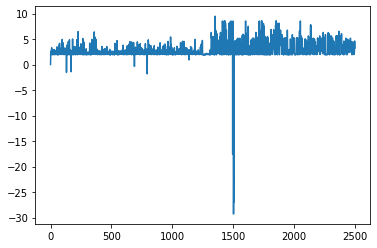

[0, 2.119429631517733, 2.641277667158674, 2.411029376801688, 1.9439898824795856, 2.0833995231821327, 2.246125697973525, 2.1258093190816307, 2.01497385251861, 3.2935893026672405, 1.9741348100158176, 2.568357298054094, 2.536896302049755, 2.2705575683197172, 1.9505724951377132, 1.968791015747538, 2.0807803121408597, 2.2183591967402037, 2.312207321663844, 2.5792452244215602, 1.9521585254308373, 1.9427200412097445, 1.936250061913678, 2.9258505055166792, 2.4637535390156877, 1.998082265844415, 2.1032622746228213, 2.1492662124298287, 2.2947096578732737, 2.468404970091604, 2.5396284106181133, 2.149061885639824, 2.8857944811653256, 2.4856953532401116, 1.947916728580345, 2.6061881069604182, 1.9600031369596593, 2.1654376158084605, 2.5801002192868525, 2.2057893993877986, 1.98223916180438, 1.9969794215446397, 2.496841065113377, 2.271480344374072, 2.1308846522451996, 2.6381485302137473, 2.1878422422987645, 2.202057165438173, 2.7726099603721095, 2.0780899052638193, 2.002384746353989, 2.024734283006594

In [6]:
plt.plot(env.total_reward)
plt.show()
print(env.total_reward)

### Run simulation

In [7]:
# Reset environment for simulation
state = env.reset()
done = False

# Graph data
inventory_levels = []
actions = []

# Run simulation with model
while not done:
    action, _states = ppo_model.predict(state)
    state, reward, done, info = env.step(action)
    
    inventory_levels.append(info["Inventory:"])
    actions.append(info["Action:"])
    
    for i in info:
        print(i, info[i], end=" | ")
    print()
    
print("\n", env.evaluation_parameters())

Steps left: 39 | Inventory: 7 | Action: 1 | Reward: 0.12 | 
Steps left: 38 | Inventory: 6 | Action: 1 | Reward: 0.14 | 
Steps left: 37 | Inventory: 10 | Action: 0 | Reward: 0.09 | 
Steps left: 36 | Inventory: 14 | Action: 0 | Reward: 0.07 | 
Steps left: 35 | Inventory: 13 | Action: 0 | Reward: 0.07 | 
Steps left: 34 | Inventory: 12 | Action: 1 | Reward: 0.08 | 
Steps left: 33 | Inventory: 11 | Action: 0 | Reward: 0.08 | 
Steps left: 32 | Inventory: 15 | Action: 0 | Reward: 0.06 | 
Steps left: 31 | Inventory: 14 | Action: 0 | Reward: 0.07 | 
Steps left: 30 | Inventory: 13 | Action: 0 | Reward: 0.07 | 
Steps left: 29 | Inventory: 12 | Action: 1 | Reward: 0.08 | 
Steps left: 28 | Inventory: 11 | Action: 0 | Reward: 0.08 | 
Steps left: 27 | Inventory: 15 | Action: 0 | Reward: 0.06 | 
Steps left: 26 | Inventory: 14 | Action: 0 | Reward: 0.07 | 
Steps left: 25 | Inventory: 13 | Action: 0 | Reward: 0.07 | 
Steps left: 24 | Inventory: 12 | Action: 1 | Reward: 0.08 | 
Steps left: 23 | Inventory

###### Inventory level graph

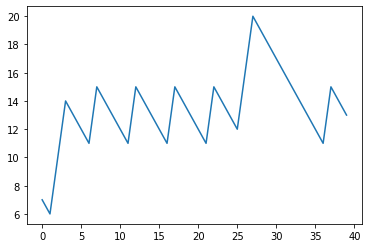

[7, 6, 10, 14, 13, 12, 11, 15, 14, 13, 12, 11, 15, 14, 13, 12, 11, 15, 14, 13, 12, 11, 15, 14, 13, 12, 16, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 15, 14, 13]
[1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, array(1), 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, array(0)]


In [8]:
plt.plot(inventory_levels)
plt.show()
print(inventory_levels)
print(actions)